# Q4. From the iris dataset, choose the 'petal length', 'sepal width' for setosa, versicolor and virginica flowers. Learn a decision boundary for the two features using a **single perceptron and SVM**. Assume that all the weights of the perceptron are initialized as 0 with the learning rate of 0.01. Draw the decision boundary.


### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cvxopt import matrix, solvers

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

### Iris Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris_dataset.csv to Iris_dataset.csv


In [ ]:
df = pd.read_csv('Iris_dataset.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
df = df.drop(['sepal.length', 'petal.width'], axis = 1)
df

,sepal.width,petal.length,variety
0,3.5,1.4,Setosa
1,3.0,1.4,Setosa
2,3.2,1.3,Setosa
3,3.1,1.5,Setosa
4,3.6,1.4,Setosa
...,...,...,...
145,3.0,5.2,Virginica
146,2.5,5.0,Virginica
147,3.0,5.2,Virginica
148,3.4,5.4,Virginica


## Single Perceptron

### Defining the necessary functions used

In [ ]:
def perceptron_training_alg(X, Y, learning_rate):
  # Adding Bias to the input and Randomly initializing weights
  num_samples, num_features = X.shape
  
  X = np.hstack((np.ones((num_samples, 1)), X))
  W = np.zeros(num_features + 1).reshape((-1, 1))

  weight_vector = []
  weight_vector.append(W)

  print(W, "\n")
  
  # Running the algorithm until all the data points are correctly classified
  samples_misclassified = True
  cnt=0
  while samples_misclassified and cnt < 100000:
    # Initially we'll assume that there are no misclassified samples
    samples_misclassified = False
    
    for index, x in enumerate(X):
      if cnt >= 100000:
        return W, np.array(weight_vector)
      
      x = Y[index] * x
      
      if np.dot(x.reshape((1, -1)), W) <= 0: # if samples misclassified
        samples_misclassified = True
        W = W + (learning_rate * x.reshape((-1, 1)))     # Gradient Descent Step
        weight_vector.append(W)

        print(W, "\n")
        cnt += 1
  
  return W, np.array(weight_vector)

In [ ]:
def sorter(X, Y):
  X_new0 = []
  Y_new0 = []
  
  X_new1 = []
  Y_new1 = []
  
  for x, y in zip(X, Y):
    if y == 0:
      Y_new0.append(y)
      X_new0.append(x)
    
    else:
      Y_new1.append(y)
      X_new1.append(x)
  
  X0 = []
  Y0 = []
  
  X1 = []
  Y1 = []

  if len(X_new0) > 0:
    X0 = np.stack(X_new0)
    Y0 = np.stack(Y_new0)
  
  elif len(X_new1) > 0:
    X1 = np.stack(X_new1)
    Y1 = np.stack(Y_new1)
  
  if len(X0) > 0 and len(X1) > 0:
    X = np.concatenate((X0, X1))
    Y = np.concatenate((Y0, Y1))
  
  elif len(X0) > 0:
    X = X0
    Y = Y0
  
  else:
    X = X1
    Y = Y1
  
  return X, Y

In [ ]:
def solve_perceptron(clas, df):
    df_4 = df[['sepal.width', 'petal.length']]
    X1 = np.array(df_4)
        
    ls = []
    ls2 = []

    for x in df.itertuples():
        print(x)
        
        if x[-1] == clas:
            ls.append([1])
            ls2.append([1])
        
        else:
            ls.append([-1])
            ls2.append([0])

    Y1=np.array(ls)
    ans1=np.array(ls2)
    
    W, weight_vector = perceptron_training_alg(X1, Y1, 0.01)
    return W, X1, ans1, weight_vector

### Code

In [ ]:
df_1 = df.loc[df.variety == 'Setosa']
print(df_1.head(5))
print(df_1.tail(5))
df_1.shape

   sepal.width  petal.length variety
0          3.5           1.4  Setosa
1          3.0           1.4  Setosa
2          3.2           1.3  Setosa
3          3.1           1.5  Setosa
4          3.6           1.4  Setosa
    sepal.width  petal.length variety
45          3.0           1.4  Setosa
46          3.8           1.6  Setosa
47          3.2           1.4  Setosa
48          3.7           1.5  Setosa
49          3.3           1.4  Setosa


(50, 3)

In [ ]:
df_2 = df.loc[df.variety == 'Virginica']
print(df_2.head(5))
print(df_2.tail(5))
df_2.shape

     sepal.width  petal.length    variety
100          3.3           6.0  Virginica
101          2.7           5.1  Virginica
102          3.0           5.9  Virginica
103          2.9           5.6  Virginica
104          3.0           5.8  Virginica
     sepal.width  petal.length    variety
145          3.0           5.2  Virginica
146          2.5           5.0  Virginica
147          3.0           5.2  Virginica
148          3.4           5.4  Virginica
149          3.0           5.1  Virginica


(50, 3)

In [ ]:
df_3 = df.loc[df.variety == 'Versicolor']
print(df_3.head(5))
print(df_3.tail(5))
df_3.shape

    sepal.width  petal.length     variety
50          3.2           4.7  Versicolor
51          3.2           4.5  Versicolor
52          3.1           4.9  Versicolor
53          2.3           4.0  Versicolor
54          2.8           4.6  Versicolor
    sepal.width  petal.length     variety
95          3.0           4.2  Versicolor
96          2.9           4.2  Versicolor
97          2.9           4.3  Versicolor
98          2.5           3.0  Versicolor
99          2.8           4.1  Versicolor


(50, 3)

In [ ]:
W1, X1, ans1, weight_vector1 = solve_perceptron('Setosa', df)

Pandas(Index=0, _1=3.5, _2=1.4, variety='Setosa')
Pandas(Index=1, _1=3.0, _2=1.4, variety='Setosa')
Pandas(Index=2, _1=3.2, _2=1.3, variety='Setosa')
Pandas(Index=3, _1=3.1, _2=1.5, variety='Setosa')
Pandas(Index=4, _1=3.6, _2=1.4, variety='Setosa')
Pandas(Index=5, _1=3.9, _2=1.7, variety='Setosa')
Pandas(Index=6, _1=3.4, _2=1.4, variety='Setosa')
Pandas(Index=7, _1=3.4, _2=1.5, variety='Setosa')
Pandas(Index=8, _1=2.9, _2=1.4, variety='Setosa')
Pandas(Index=9, _1=3.1, _2=1.5, variety='Setosa')
Pandas(Index=10, _1=3.7, _2=1.5, variety='Setosa')
Pandas(Index=11, _1=3.4, _2=1.6, variety='Setosa')
Pandas(Index=12, _1=3.0, _2=1.4, variety='Setosa')
Pandas(Index=13, _1=3.0, _2=1.1, variety='Setosa')
Pandas(Index=14, _1=4.0, _2=1.2, variety='Setosa')
Pandas(Index=15, _1=4.4, _2=1.5, variety='Setosa')
Pandas(Index=16, _1=3.9, _2=1.3, variety='Setosa')
Pandas(Index=17, _1=3.5, _2=1.4, variety='Setosa')
Pandas(Index=18, _1=3.8, _2=1.7, variety='Setosa')
Pandas(Index=19, _1=3.8, _2=1.5, variety=

In [ ]:
W2, X2, ans2, weight_vector2 = solve_perceptron('Virginica', df)

Streaming output truncated to the last 5000 lines.
[[-3.81 ]
 [-0.865]
 [ 1.331]] 

[[-3.8  ]
 [-0.835]
 [ 1.379]] 

[[-3.81 ]
 [-0.867]
 [ 1.332]] 

[[-3.82 ]
 [-0.898]
 [ 1.283]] 

[[-3.83 ]
 [-0.923]
 [ 1.234]] 

[[-3.82 ]
 [-0.896]
 [ 1.285]] 

[[-3.81 ]
 [-0.871]
 [ 1.33 ]] 

[[-3.8  ]
 [-0.841]
 [ 1.378]] 

[[-3.81 ]
 [-0.872]
 [ 1.329]] 

[[-3.82 ]
 [-0.894]
 [ 1.284]] 

[[-3.83 ]
 [-0.919]
 [ 1.235]] 

[[-3.82 ]
 [-0.892]
 [ 1.286]] 

[[-3.81 ]
 [-0.867]
 [ 1.331]] 

[[-3.8  ]
 [-0.837]
 [ 1.379]] 

[[-3.81 ]
 [-0.869]
 [ 1.332]] 

[[-3.82 ]
 [-0.9  ]
 [ 1.283]] 

[[-3.83 ]
 [-0.925]
 [ 1.234]] 

[[-3.82 ]
 [-0.898]
 [ 1.285]] 

[[-3.81 ]
 [-0.873]
 [ 1.33 ]] 

[[-3.8  ]
 [-0.843]
 [ 1.378]] 

[[-3.81 ]
 [-0.874]
 [ 1.329]] 

[[-3.82 ]
 [-0.896]
 [ 1.284]] 

[[-3.83 ]
 [-0.921]
 [ 1.235]] 

[[-3.82 ]
 [-0.894]
 [ 1.286]] 

[[-3.81 ]
 [-0.869]
 [ 1.331]] 

[[-3.8  ]
 [-0.839]
 [ 1.379]] 

[[-3.81]
 [-0.87]
 [ 1.33]] 

[[-3.82 ]
 [-0.892]
 [ 1.285]] 

[[-3.83 ]
 [-0.917]
 [ 1.236

In [ ]:
W3, X3, ans3, weight_vector3 = solve_perceptron('Versicolor', df)

Streaming output truncated to the last 5000 lines.
[[0.09 ]
 [0.022]
 [0.028]] 

[[ 0.08 ]
 [-0.011]
 [-0.032]] 

[[ 0.07 ]
 [-0.041]
 [-0.046]] 

[[ 0.08 ]
 [-0.009]
 [ 0.001]] 

[[ 0.07 ]
 [-0.042]
 [-0.059]] 

[[ 0.08 ]
 [-0.01 ]
 [-0.012]] 

[[0.09 ]
 [0.022]
 [0.033]] 

[[ 0.08 ]
 [-0.011]
 [-0.027]] 

[[ 0.07 ]
 [-0.046]
 [-0.041]] 

[[ 0.08 ]
 [-0.014]
 [ 0.006]] 

[[ 0.07 ]
 [-0.047]
 [-0.054]] 

[[ 0.08 ]
 [-0.015]
 [-0.007]] 

[[0.09 ]
 [0.016]
 [0.042]] 

[[ 0.08 ]
 [-0.017]
 [-0.018]] 

[[ 0.07 ]
 [-0.047]
 [-0.032]] 

[[ 0.08 ]
 [-0.015]
 [ 0.015]] 

[[ 0.07 ]
 [-0.048]
 [-0.045]] 

[[ 0.08 ]
 [-0.016]
 [ 0.002]] 

[[ 0.07 ]
 [-0.049]
 [-0.058]] 

[[ 0.08 ]
 [-0.017]
 [-0.011]] 

[[0.09 ]
 [0.015]
 [0.034]] 

[[ 0.08 ]
 [-0.018]
 [-0.026]] 

[[ 0.07 ]
 [-0.041]
 [-0.039]] 

[[ 0.08 ]
 [-0.009]
 [ 0.008]] 

[[ 0.07 ]
 [-0.042]
 [-0.052]] 

[[ 0.08 ]
 [-0.01 ]
 [-0.005]] 

[[ 0.07 ]
 [-0.043]
 [-0.065]] 

[[ 0.08 ]
 [-0.011]
 [-0.018]] 

[[0.09 ]
 [0.021]
 [0.027]] 

[[ 0.08

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


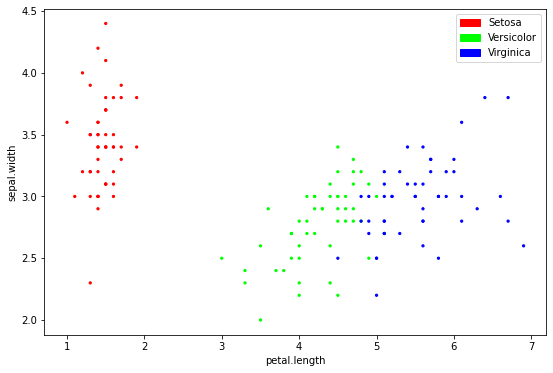

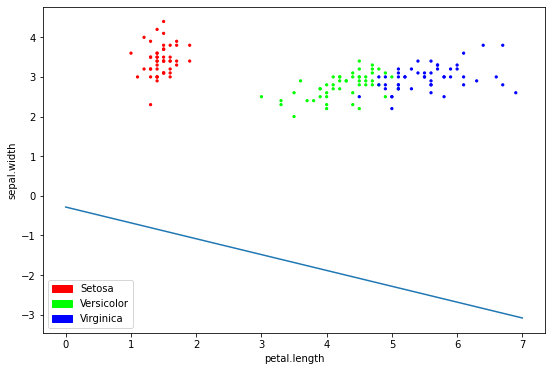

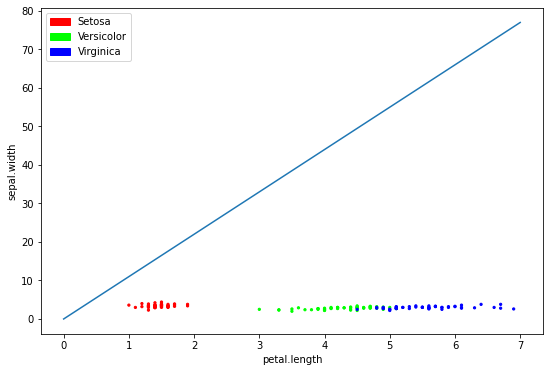

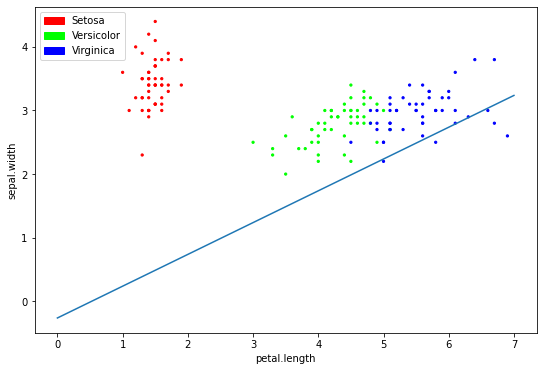

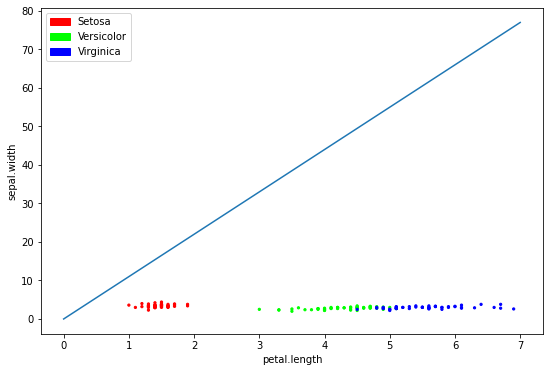

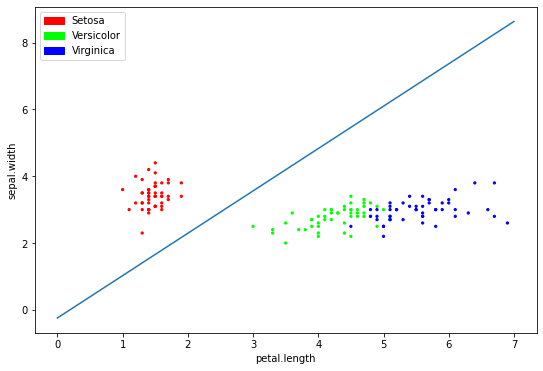

In [ ]:
for w in weight_vector1:
  cm  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
  patch0 = mpatches.Patch(color = '#FF0000', label = 'Setosa')
  patch1 = mpatches.Patch(color = '#00FF00', label = 'Versicolor')
  patch2 = mpatches.Patch(color = '#0000FF', label = 'Virginica')

  x1 = np.arange(8)

  plt.figure(figsize = (9, 6))
  plt.scatter(df['petal.length'], df['sepal.width'], c = [0] * 50 + [1] * 50 + [2] * 50, cmap = cm, s = 5)
  plt.xlabel('petal.length')
  plt.ylabel('sepal.width')
  plt.legend(handles = [patch0, patch1, patch2])

  slope, c = -w[2] / w[1], -w[0] / w[1]
  plt.plot(x1, slope * x1 + c)
  plt.show()

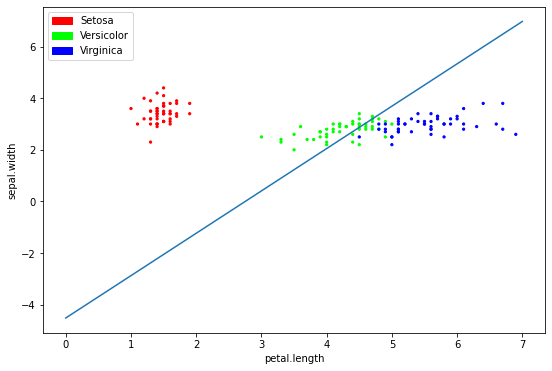

In [ ]:
w = W2
cm  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
patch0 = mpatches.Patch(color = '#FF0000', label = 'Setosa')
patch1 = mpatches.Patch(color = '#00FF00', label = 'Versicolor')
patch2 = mpatches.Patch(color = '#0000FF', label = 'Virginica')

x1 = np.arange(8)

plt.figure(figsize = (9, 6))
plt.scatter(df['petal.length'], df['sepal.width'], c = [0] * 50 + [1] * 50 + [2] * 50, cmap = cm, s = 5)
plt.xlabel('petal.length')
plt.ylabel('sepal.width')
plt.legend(handles = [patch0, patch1, patch2])

slope, c = -w[2] / w[1], -w[0] / w[1]
plt.plot(x1, slope * x1 + c)
plt.show()

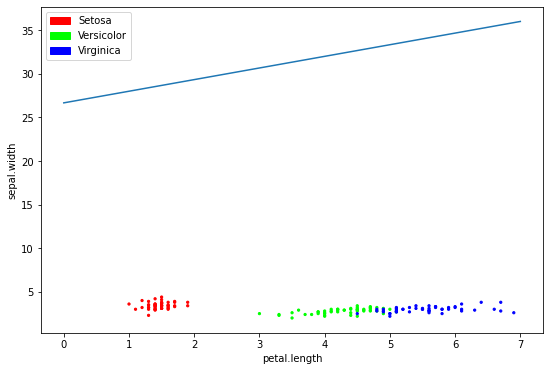

In [ ]:
w = W3
cm  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
patch0 = mpatches.Patch(color = '#FF0000', label = 'Setosa')
patch1 = mpatches.Patch(color = '#00FF00', label = 'Versicolor')
patch2 = mpatches.Patch(color = '#0000FF', label = 'Virginica')

x1 = np.arange(8)

plt.figure(figsize = (9, 6))
plt.scatter(df['petal.length'], df['sepal.width'], c = [0] * 50 + [1] * 50 + [2] * 50, cmap = cm, s = 5)
plt.xlabel('petal.length')
plt.ylabel('sepal.width')
plt.legend(handles = [patch0, patch1, patch2])

slope, c = -w[2] / w[1], -w[0] / w[1]
plt.plot(x1, slope * x1 + c)
plt.show()

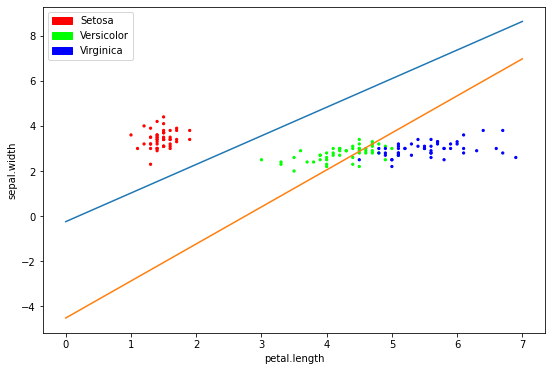

In [ ]:
cm  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
patch0 = mpatches.Patch(color = '#FF0000', label = 'Setosa')
patch1 = mpatches.Patch(color = '#00FF00', label = 'Versicolor')
patch2 = mpatches.Patch(color = '#0000FF', label = 'Virginica')

x1 = np.arange(8)

plt.figure(figsize = (9, 6))
plt.scatter(df['petal.length'], df['sepal.width'], c = [0] * 50 + [1] * 50 + [2] * 50, cmap = cm, s = 5)
plt.xlabel('petal.length')
plt.ylabel('sepal.width')
plt.legend(handles = [patch0, patch1, patch2])

w = W1
slope, c = -w[2] / w[1], -w[0] / w[1]
plt.plot(x1, slope * x1 + c)

w = W2
slope, c = -w[2] / w[1], -w[0] / w[1]
plt.plot(x1, slope * x1 + c)
plt.show()

## SVM

### Defining the necessary functions used

In [ ]:
def SVM(C1, C2):
  x1 = np.array(C1.to_numpy())
  x2 = np.array(C2.to_numpy())

  x = np.vstack((x1, x2))
  y = np.hstack((np.ones(len(x1)), np.ones(len(x2)) * -1))
  
  X = np.dot(x, np.transpose(x))
  Y = np.outer(y, y)

  n = X.shape[0]

  H = matrix(Y * X)
  f = matrix(np.ones(n) * -1)
  A = matrix(np.diag(np.ones(n) * -1))
  a = matrix(np.zeros(n))
  B = matrix(y, (1, n))  
  b = matrix(0.0)
  
  # solve QP problem
  solution = solvers.qp(H, f, A, a, B, b)
  print('')

  # Lagrange multipliers
  t1 = np.ravel(solution['x'])
  
  # Support vectors have non zero lagrange multipliers
  for i in range(0, len(t1)):
    if(t1[i] < 1e-4):
      t1[i] = 0.0
    else:
      t1[i] = round(t1[i], 4)
  
  t1 = np.array(t1)
  print(t1)

  # Weight vector
  w = np.zeros(X.shape[1])
  for i in range(X.shape[1]):
    w[i] = t1[i] * y[i]
  
  w = np.dot(w, x)
  
  # Intercept
  b = 0
  for i in range(len(t1)):
    if(t1[i] != 0.0):
      b = round(1 - np.dot(w, np.transpose(x[i])), 4)
      break
  
  return w, b

In [ ]:
def decision_boundary(labels, C1, W1, b1, C2, W2, b2, C3, W3, b3):
  x = np.arange(8)

  plt.figure(figsize = (9, 6))
  plt.scatter(C1['petal.length'], C1['sepal.width'], label = 'Setosa', color = '#FF0000')
  plt.scatter(C2['petal.length'], C2['sepal.width'], label = 'Versicolor', color = '#00FF00')
  plt.scatter(C3['petal.length'], C3['sepal.width'], label = 'Virginica', color = '#0000FF')
  
  plt.suptitle("Iris Dataset Classification", fontweight = "bold")
  plt.ylabel("Petal length (in cm)", fontweight = "bold")
  plt.xlabel("Sepal width (in cm)", fontweight = "bold")

  w = W1
  b = b1
  print(w, "\n")
  slope, c = -w[0] / w[1], -b / w[1]
  plt.plot(x, slope * x + c, label = "Decision Boundary - Setosa and Versicolor")

  w = W3
  b = b3
  print(w, "\n")
  slope, c = -w[0] / w[1], -b / w[1]
  plt.plot(x, slope * x + c, label = "Decision Boundary - Setosa and Virginica")
  plt.legend()
  plt.show()
  
  plt.figure(figsize = (9, 6))
  plt.scatter(C1['petal.length'], C1['sepal.width'], label = 'Setosa', color = '#FF0000')
  plt.scatter(C2['petal.length'], C2['sepal.width'], label = 'Versicolor', color = '#00FF00')
  plt.scatter(C3['petal.length'], C3['sepal.width'], label = 'Virginica', color = '#0000FF')
  
  plt.suptitle("Iris Dataset Classification", fontweight = "bold")
  plt.ylabel("Petal length (in cm)", fontweight = "bold")
  plt.xlabel("Sepal width (in cm)", fontweight = "bold")

  w = W1
  b = b1
  print(w, "\n")
  slope, c = -w[0] / w[1], -b / w[1]
  plt.plot(x, slope * x + c, label = "Decision Boundary - Setosa and Versicolor")

  w = W3
  b = b3
  print(w, "\n")
  slope, c = -w[0] / w[1], -b / w[1]
  plt.plot(x, slope * x + c, label = "Decision Boundary - Setosa and Virginica")

  w = W2
  b = b2
  print(w, "\n")
  slope, c = -w[0] / w[1], -b / w[1]
  plt.plot(x, slope * x + c, label = "Decision Boundary - Versicolor and Virginica")
  plt.legend()
  plt.show()

### Code

In [ ]:
C1 = df.loc[df.variety == 'Setosa'].drop(['variety'], axis = 1)
print(C1.head(5))
print(C1.tail(5))
C1.shape

   sepal.width  petal.length
0          3.5           1.4
1          3.0           1.4
2          3.2           1.3
3          3.1           1.5
4          3.6           1.4
    sepal.width  petal.length
45          3.0           1.4
46          3.8           1.6
47          3.2           1.4
48          3.7           1.5
49          3.3           1.4


(50, 2)

In [ ]:
C2 = df.loc[df.variety == 'Versicolor'].drop(['variety'], axis = 1)
print(C2.head(5))
print(C2.tail(5))
C2.shape

    sepal.width  petal.length
50          3.2           4.7
51          3.2           4.5
52          3.1           4.9
53          2.3           4.0
54          2.8           4.6
    sepal.width  petal.length
95          3.0           4.2
96          2.9           4.2
97          2.9           4.3
98          2.5           3.0
99          2.8           4.1


(50, 2)

In [ ]:
C3 = df.loc[df.variety == 'Virginica'].drop(['variety'], axis = 1)
print(C3.head(5))
print(C3.tail(5))
C3.shape

     sepal.width  petal.length
100          3.3           6.0
101          2.7           5.1
102          3.0           5.9
103          2.9           5.6
104          3.0           5.8
     sepal.width  petal.length
145          3.0           5.2
146          2.5           5.0
147          3.0           5.2
148          3.4           5.4
149          3.0           5.1


(50, 2)

In [ ]:
w1, b1 = SVM(C1, C2)

print(w1)
print('')
print(b1)

     pcost       dcost       gap    pres   dres
 0: -4.3867e+00 -8.1716e+00  3e+02  1e+01  2e+00
 1: -2.3798e+00 -2.5258e+00  2e+01  1e+00  2e-01
 2: -4.3479e-01 -1.7538e+00  2e+00  5e-02  6e-03
 3: -6.7595e-01 -1.0544e+00  5e-01  1e-02  1e-03
 4: -8.1435e-01 -1.1260e+00  4e-01  4e-03  5e-04
 5: -1.0085e+00 -1.0271e+00  2e-02  8e-05  1e-05
 6: -1.0251e+00 -1.0253e+00  2e-04  9e-07  1e-07
 7: -1.0253e+00 -1.0253e+00  2e-06  9e-09  1e-09
 8: -1.0253e+00 -1.0253e+00  2e-08  9e-11  1e-11
Optimal solution found.

[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.8098 0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.2155 0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.

In [ ]:
w2, b2 = SVM(C2, C3)

print(w2)
print('')
print(b2)

     pcost       dcost       gap    pres   dres
 0: -3.7394e+01 -8.7261e+01  5e+02  2e+01  2e+00
 1: -1.0739e+02 -1.7754e+02  3e+02  1e+01  2e+00
 2: -5.7593e+02 -8.7585e+02  4e+02  1e+01  2e+00
 3: -1.9989e+03 -2.2838e+03  3e+02  1e+01  1e+00
 4: -6.2946e+03 -6.9640e+03  7e+02  1e+01  1e+00
 5: -3.5722e+04 -3.7828e+04  2e+03  1e+01  1e+00
 6: -1.6095e+05 -1.6859e+05  8e+03  1e+01  1e+00
 7: -2.7869e+06 -2.8212e+06  3e+04  9e+00  1e+00
 8: -1.2140e+08 -1.2212e+08  7e+05  9e+00  1e+00
 9: -1.9228e+10 -1.9236e+10  8e+06  9e+00  1e+00
10: -1.9394e+10 -1.9402e+10  8e+06  9e+00  1e+00
11: -2.1446e+10 -2.1454e+10  8e+06  9e+00  1e+00
12: -3.4380e+10 -3.4393e+10  1e+07  9e+00  1e+00
13: -5.4784e+10 -5.4805e+10  2e+07  9e+00  1e+00
14: -8.7577e+10 -8.7607e+10  3e+07  9e+00  1e+00
15: -1.0218e+11 -1.0222e+11  3e+07  9e+00  1e+00
Terminated (singular KKT matrix).

[2.71521160e+07 4.51595280e+06 1.29133612e+08 1.00265211e+08
 3.09216898e+08 1.42980907e+08 4.25115472e+06 1.24416108e+07
 1.96826025

In [ ]:
w3, b3 = SVM(C1, C3)

print(w3)
print('')
print(b3)

     pcost       dcost       gap    pres   dres
 0: -3.3137e+00 -4.9765e+00  2e+02  2e+01  1e+00
 1: -1.6126e-01 -8.1531e-01  1e+01  9e-01  8e-02
 2:  1.9106e-02 -6.5205e-01  9e-01  1e-02  1e-03
 3: -1.5487e-01 -2.7974e-01  1e-01  7e-04  6e-05
 4: -2.2572e-01 -2.8972e-01  6e-02  1e-04  1e-05
 5: -2.5983e-01 -2.6459e-01  5e-03  1e-05  8e-07
 6: -2.6415e-01 -2.6421e-01  5e-05  1e-07  9e-09
 7: -2.6420e-01 -2.6420e-01  5e-07  1e-09  9e-11
 8: -2.6420e-01 -2.6420e-01  5e-09  1e-11  9e-13
Optimal solution found.

[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.2642 0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.2642 0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.

[ 0.68572 -1.25713] 

[ 0.23778 -0.68692] 



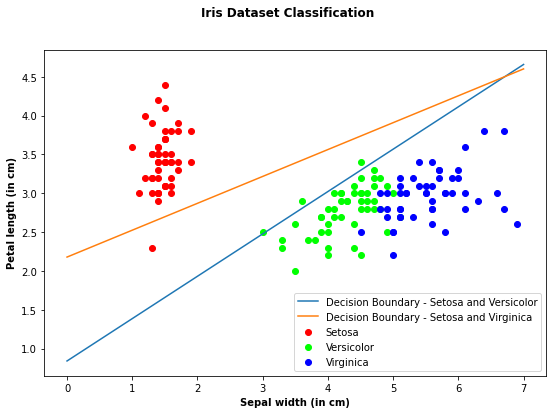

[ 0.68572 -1.25713] 

[ 0.23778 -0.68692] 

[0.00036621 0.00012207] 



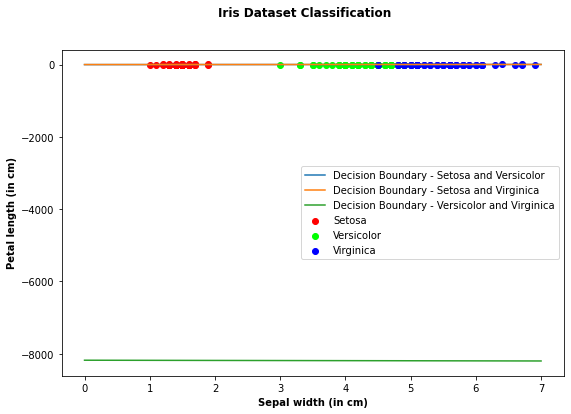

In [ ]:
decision_boundary(["Setosa", "Versicolor", "Virginica"], C1, w1, b1, C2, w2, b2, C3, w3, b3)